In [1]:
import pandas as pd
import numpy as np 

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, auc, average_precision_score

In [2]:
df = pd.read_csv('./datasets/amazon_cells_labelled.txt', sep='\t', header=None)
df.columns = ['text', 'target']

In [3]:
print(df)

                                                  text  target
0    So there is no way for me to plug it in here i...       0
1                          Good case, Excellent value.       1
2                               Great for the jawbone.       1
3    Tied to charger for conversations lasting more...       0
4                                    The mic is great.       1
..                                                 ...     ...
995  The screen does get smudged easily because it ...       0
996  What a piece of junk.. I lose more calls on th...       0
997                       Item Does Not Match Picture.       0
998  The only thing that disappoint me is the infra...       0
999  You can not answer calls with the unit, never ...       0

[1000 rows x 2 columns]


In [4]:
# Balanceamento da base
df.target.value_counts(normalize=True)

target
0    0.5
1    0.5
Name: proportion, dtype: float64

Treinar modelo com RandomForest

In [5]:
X = df['text']
y= df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train_indices = X_train.index
X_test_indices = X_test.index

X_train_text = df['text'].iloc[X_train_indices]
X_test_text = df['text'].iloc[X_test_indices]

vectorizer = TfidfVectorizer()

X_train_tfidf = vectorizer.fit_transform(X_train_text)
X_test_tfidf = vectorizer.transform(X_test_text)

model = RandomForestClassifier()

model.fit(X_train_tfidf, y_train)

RandomForestClassifier()

In [6]:
y_pred = model.predict(X_test_tfidf)

In [7]:
y_pred

array([1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1])

In [8]:
accuracy = accuracy_score(y_test, y_pred) # accuracy VP (Verdadeiro positivo) + VN (Verdadeiro Negativo) / VP + VN + FP (Falso positivo) + FN (Falso negativo)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)

Accuracy:  0.784
Precision:  0.8099173553719008
Recall:  0.7596899224806202


In [9]:
y_proba = model.predict_proba(X_test_tfidf)

y_proba_1 = y_proba[:,1]

In [30]:
y_proba_1[y_test==0]

array([0.18, 0.37, 0.26, 0.09, 0.45, 0.  , 0.12, 0.12, 0.3 , 0.45, 0.  ,
       0.47, 0.2 , 0.44, 0.5 , 0.5 , 0.2 , 0.28, 0.56, 0.22, 0.37, 0.23,
       0.3 , 0.57, 0.77, 0.39, 0.49, 0.35, 0.32, 0.05, 0.09, 0.18, 0.18,
       0.29, 0.17, 0.37, 0.27, 0.44, 0.35, 0.17, 0.46, 0.11, 0.07, 0.49,
       0.43, 0.4 , 0.24, 0.28, 0.24, 0.33, 0.39, 0.62, 0.32, 0.46, 0.36,
       0.33, 0.22, 0.69, 0.28, 0.15, 0.52, 0.42, 0.36, 0.14, 0.67, 0.16,
       0.44, 0.46, 0.33, 0.02, 0.36, 0.18, 0.34, 0.45, 0.41, 0.12, 0.57,
       0.27, 0.33, 0.67, 0.08, 0.09, 0.38, 0.18, 0.07, 0.53, 0.56, 0.16,
       0.22, 0.91, 0.53, 0.27, 0.6 , 0.13, 0.39, 0.1 , 0.17, 0.07, 0.14,
       0.71, 0.25, 0.48, 0.3 , 0.66, 0.42, 0.27, 0.25, 0.68, 0.39, 0.24,
       0.11, 0.52, 0.52, 0.62, 0.06, 0.34, 0.15, 0.74, 0.22, 0.6 , 0.56])

In [10]:
# Retornar os valores da curva ROC - TPR (True Positive Rate (Verdadeiros positivos)), FPR (False Positive Rate), Threshold
fpr, tpr, thresholds = roc_curve(y_test, y_proba_1) # roc curve me retorna as taxas

In [11]:
# Calcular AUC (Area Under the curve), com base nos valores da curva roc
roc_auc = auc(fpr, tpr)
roc_auc

np.float64(0.8772823371132039)

In [12]:
area = roc_auc_score(y_test,y_proba_1)
area

np.float64(0.8772823371132039)

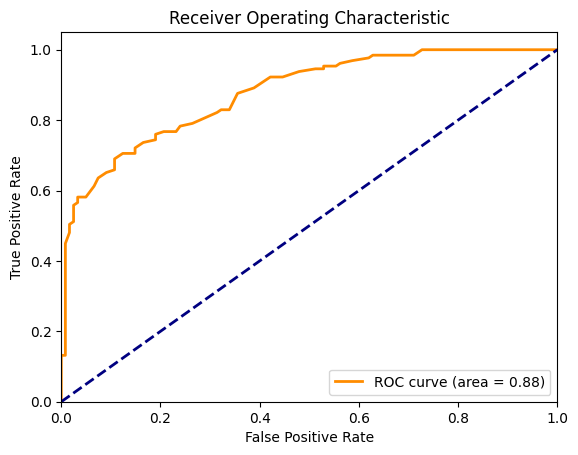

In [13]:
# Plotar Curva ROC com o valor de AUC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [14]:
# PR AUC
pr_auc = average_precision_score(y_test, y_pred)
pr_auc

np.float64(0.7392860529181882)

array([[<Axes: title={'center': '0'}>]], dtype=object)

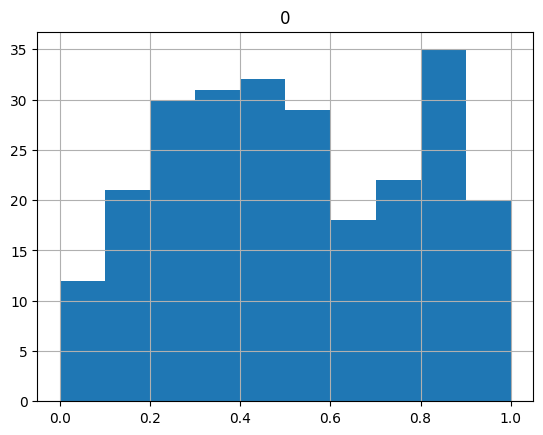

In [15]:
pd.DataFrame(y_proba_1).hist(bins = 10)

In [16]:
y_proba_count, bin_edges = np.histogram(y_proba_1, bins=10)

In [17]:
y_proba_percentage = (y_proba_count / (y_proba_count.sum())) * 100

In [18]:
df_results = pd.DataFrame({
  'y_proba_1': y_proba_1,
  'y_test': y_test
})

In [19]:
df_results_filtered = df_results[df_results['y_test'] == 1]

<Axes: >

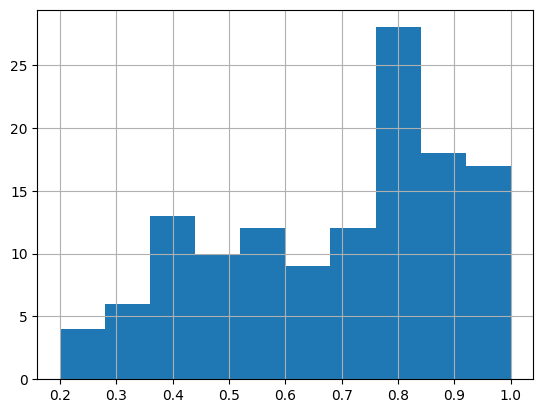

In [20]:
df_results_filtered['y_proba_1'].hist(bins=10)

In [21]:
y_proba_1_filtered = df_results_filtered['y_proba_1']

y_proba_1_filtered_count, bin_edges = np.histogram(y_proba_1_filtered, bins=10)

In [22]:
y_proba_1_filtered_count

array([ 4,  6, 13, 10, 12,  9, 12, 28, 18, 17])

In [23]:
y_proba_filtered_percentage = (y_proba_1_filtered_count / (y_proba_1_filtered_count.sum())) * 100

y_proba_filtered_percentage

array([ 3.10077519,  4.65116279, 10.07751938,  7.75193798,  9.30232558,
        6.97674419,  9.30232558, 21.70542636, 13.95348837, 13.17829457])

In [24]:
df_melt = pd.DataFrame({
  'filtered_proba': y_proba_filtered_percentage,
  'proba': y_proba_percentage
})

In [25]:
df_melt

,filtered_proba,proba
0,3.100775,4.8
1,4.651163,8.4
2,10.077519,12.0
3,7.751938,12.4
4,9.302326,12.8
5,6.976744,11.6
6,9.302326,7.2
7,21.705426,8.8
8,13.953488,14.0
9,13.178295,8.0


/tmp/ipykernel_180210/3427427493.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(percentages)


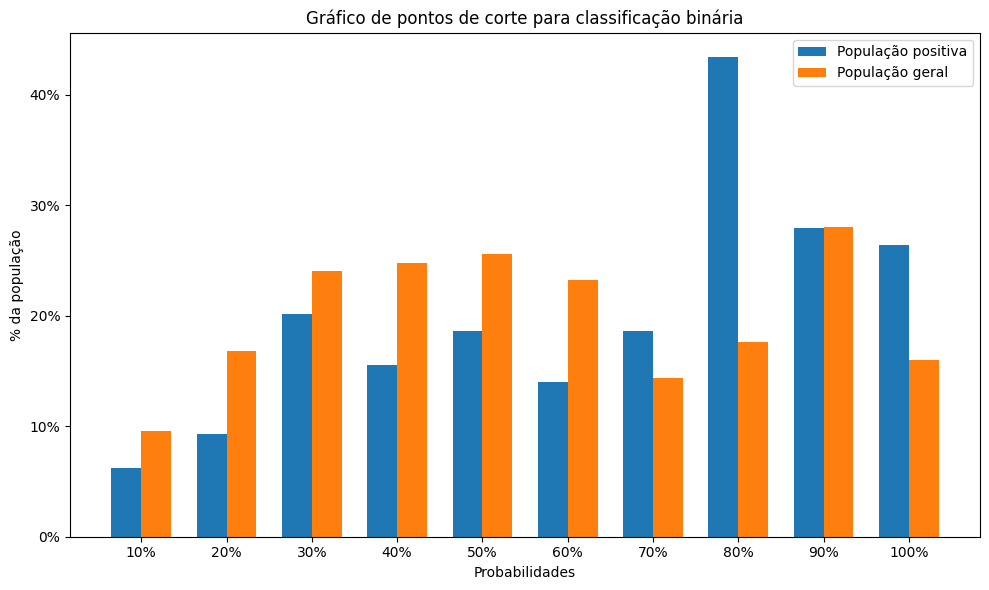

In [26]:
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = range(len(df_melt))

# Plotando as barras lado a lado
ax.bar(index, df_melt['filtered_proba'], bar_width, label='População positiva')
ax.bar([i + bar_width for i in index], df_melt['proba'], bar_width, label='População geral')

ax.set_xlabel('Probabilidades')
ax.set_ylabel('% da população')
ax.set_title('Gráfico de pontos de corte para classificação binária')

percentages = ['0%', '10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%']
ax.set_yticklabels(percentages)

percentages = ['10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%']
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(percentages)

ax.legend()
plt.tight_layout()
plt.show()